In [265]:
%matplotlib inline  
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as optimize
import sympy

2.51432404045 4.32182538051
[ -6.82121026e-13  -1.02538422e-10] 




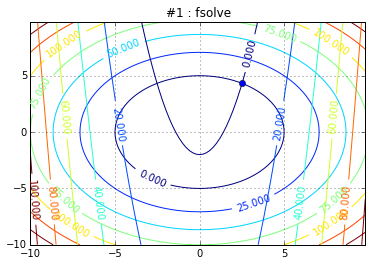

In [266]:
#1: fsolve
def f(p):
    x, y = p
    return np.array([x**2 + y**2 - 25, x**2 - y - 2])

x, y = optimize.fsolve(f, (1, 1))

print x, y
print f((x, y)), "\n\n"

#Plot
x_mesh = np.arange(-10, 10, .2)
y_mesh = np.arange(-10, 10, .2)
X, Y = np.meshgrid(x_mesh, y_mesh)
Z1 = X**2 + Y**2 - 25
Z2 = X**2 - Y - 2

CS1 = plt.contour(X, Y, Z1)
CS2 = plt.contour(X, Y, Z2)
plt.clabel(CS1, inline=1, fontsize=10)
plt.clabel(CS2, inline=1, fontsize=10)
plt.grid()
pt = plt.plot(x, y, '-bo')
plt.title("#1 : fsolve")
plt.show()

2.51432574719239 4.32182539149512
[8.67756652667140e-6 8.57149944000213e-6] 




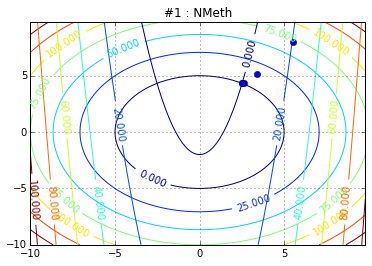

In [269]:
#1: Secant method
def f(p):
    x, y = p
    return np.array([x**2 + y**2 - 25, x**2 - y - 2])

x, y = sympy.symbols("x, y")
F = sympy.Matrix([x**2 + y**2 - 25, x**2 - y -2])
J = F.jacobian([x, y])

tol = 1e-4
max_iter = 1000
x_val = 1
y_val = 1
p = [(x, x_val), (y, y_val)]
diff = 1

for i in range(0, max_iter):
    values = -J.subs(p).inv()*F.subs(p)
    x_val = x_val + values[0]
    y_val = y_val + values[1]
    p = [(x, x_val), (y, y_val)]
    pt = plt.plot(x_val*1.0, y_val*1.0, '-bo')
    if F.subs(p)[0] * 1.0 <= tol and F.subs(p)[1] * 1.0 <= tol:
        print x_val * 1.0, y_val * 1.0
        print f((x_val*1.0, y_val*1.0)), "\n\n"
        break
        
#Plot
x_mesh = np.arange(-10, 10, .2)
y_mesh = np.arange(-10, 10, .2)
X, Y = np.meshgrid(x_mesh, y_mesh)
Z1 = X**2 + Y**2 - 25
Z2 = X**2 - Y - 2

CS1 = plt.contour(X, Y, Z1)
CS2 = plt.contour(X, Y, Z2)
plt.clabel(CS1, inline=1, fontsize=10)
plt.clabel(CS2, inline=1, fontsize=10)
plt.grid()
plt.title("#1 : NMeth")
plt.show()

[[ 2.51432404]
 [ 4.32182538]]
[[  6.73402667e-10]
 [  6.65513866e-10]]


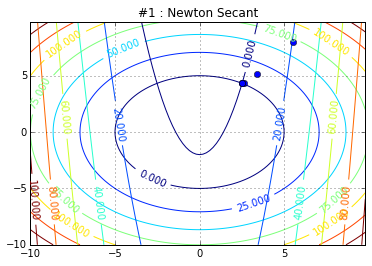

In [268]:
#1: Newton Secant
def f(p):
    x = p[0, 0]
    y = p[1, 0]
    return np.array([[x**2 + y**2 - 25], [x**2 - y - 2]])

x0 = np.array([[1.0], [1.0]])
max_iter = 200
dx = np.sqrt(np.finfo(np.float32).eps)
iteration = 0
tol = 1.0e-6
xn = x0
N = len(x0)
err = 1.0
J = np.zeros((N, N))
fxn = f(x0)

while (iteration < max_iter and err > tol):
    
    for j in range(0, N):     
        x = xn.copy()
        x[j] = xn[j] + dx
        fx = f(x)
        J[:,[j]] = (fx - fxn)/dx
                        
    delta = -np.linalg.lstsq(J, fxn)[0]
    xnn = xn+delta
    err = np.linalg.norm(delta, np.inf)/np.linalg.norm(xn, np.inf)
    iteration = iteration + 1
    xn = xnn
    fxn = f(xnn)
    plt.plot(xnn[0], xnn[1], '-bo')
x = xnn
fval = fxn

print x
print fval

#Plot
x_mesh = np.arange(-10, 10, .2)
y_mesh = np.arange(-10, 10, .2)
X, Y = np.meshgrid(x_mesh, y_mesh)
Z1 = X**2 + Y**2 - 25
Z2 = X**2 - Y - 2

CS1 = plt.contour(X, Y, Z1)
CS2 = plt.contour(X, Y, Z2)
plt.clabel(CS1, inline=1, fontsize=10)
plt.clabel(CS2, inline=1, fontsize=10)
plt.grid()
plt.title("#1 : Newton Secant")
plt.show()